In [45]:
import pandas as pd
import numpy as np
import random
import networkx as nx

data = {
    'source': ['A', 'B', 'C', 'D', 'E', 'A', 'B'],
    'target': ['B', 'C', 'D', 'E', 'F', 'D', 'E'],
    'weight': [1, 2, 3, 4, 5, 2, 3]
}
df_edges = pd.DataFrame(data)
df_edges

,source,target,weight
0,A,B,1
1,B,C,2
2,C,D,3
3,D,E,4
4,E,F,5
5,A,D,2
6,B,E,3


In [46]:
G = nx.DiGraph()

In [47]:
for _, row in df_edges.iterrows():
    G.add_edge(row['source'], row['target'], weight=row['weight'])
print(f"Graph edges with weights: {list(G.edges(data=True))}")

Graph edges with weights: [('A', 'B', {'weight': 1}), ('A', 'D', {'weight': 2}), ('B', 'C', {'weight': 2}), ('B', 'E', {'weight': 3}), ('C', 'D', {'weight': 3}), ('D', 'E', {'weight': 4}), ('E', 'F', {'weight': 5})]


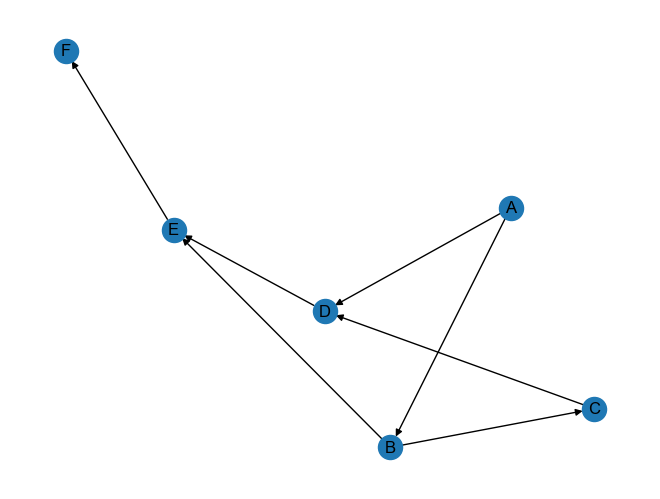

In [48]:
nx.draw(G, with_labels=True)

In [49]:
from typing import List
def is_valid_path(path: List[str], graph) -> bool:
    for i in range(len(path) - 1):
        if not graph.has_edge(path[i], path[i + 1]):
            return False
    return True


In [50]:
is_valid_path(['A', 'B', 'F', 'E'], G)

False

In [51]:
def fitness(path, graph):
    if not is_valid_path(path, graph):
        return -float('inf')
    return -len(path)
def crossover(parent1, parent2):
    split = random.randint(1, min(len(parent1), len(parent2)) -1)
    offspring = parent1[:split] + parent2[split:]
    return offspring if is_valid_path(offspring, G) else parent1
def mutate(path):
    mutated_path = path.copy()
    index = random.randint(0, len(path) -1)
    mutated_path[index] = random.choice(list(G.nodes()))
    return mutated_path if is_valid_path(mutated_path, G) else path
def generate_population(size, start, goal, graph):
    population = []
    for _ in range(size):
        path = [start]
        current = start
        while current != goal:
            neighbours = list(G.neighbors(current))
            if not neighbours:
                break
            current = random.choice(neighbours)
            path.append(current)
        if is_valid_path(path, graph):
            population.append(path)
    return population
def genetic_algorithm(population_size, generations, start, goal, graph):
    population = generate_population(population_size, start, goal, graph)
    for gen in range(generations):
        population = sorted(population, key=lambda path: fitness(path, graph), reverse=True)
        next_generation = population[:2]

        for i in range(2, population_size):
            parent1, parent2 = random.choices(population[:10], k=2)
            child = crossover(parent1, parent2)
            child = mutate(child)
            next_generation.append(child)
        population = next_generation
        print(f'Generation {gen + 1}: Best Path: {population[0]} Fitness: {fitness(population[0], graph)}')
    return population[0]
best_path = genetic_algorithm(population_size=10, generations=10, start='A', goal='F', graph=G)
print(f'Best Path: {best_path}')

Generation 1: Best Path: ['A', 'D', 'E', 'F'] Fitness: -4
Generation 2: Best Path: ['A', 'D', 'E', 'F'] Fitness: -4
Generation 3: Best Path: ['A', 'D', 'E', 'F'] Fitness: -4
Generation 4: Best Path: ['A', 'D', 'E', 'F'] Fitness: -4
Generation 5: Best Path: ['A', 'D', 'E', 'F'] Fitness: -4
Generation 6: Best Path: ['A', 'D', 'E', 'F'] Fitness: -4
Generation 7: Best Path: ['A', 'D', 'E', 'F'] Fitness: -4
Generation 8: Best Path: ['A', 'D', 'E', 'F'] Fitness: -4
Generation 9: Best Path: ['A', 'D', 'E', 'F'] Fitness: -4
Generation 10: Best Path: ['A', 'D', 'E', 'F'] Fitness: -4
Best Path: ['A', 'D', 'E', 'F']


In [65]:
import random
import networkx as nx
import pandas as pd

# Create a DataFrame (simulating large data)
data = {
    'source': ['A', 'A', 'B', 'B', 'C', 'C', 'D', 'D', 'E', 'E', 'F', 'F', 'G', 'G'],
    'target': ['B', 'D', 'C', 'E', 'D', 'F', 'E', 'F', 'F', 'G', 'G', 'H', 'H', 'I'],
    'weight': [1, 3, 2, 4, 1, 5, 2, 3, 4, 5, 1, 6, 2, 3]
}
df_edges = pd.DataFrame(data)

# Create the directed graph
G = nx.DiGraph()
for _, row in df_edges.iterrows():
    G.add_edge(row['source'], row['target'], weight=row['weight'])

print("Graph edges:", list(G.edges(data=True)))

def is_valid_path(path, graph):
    for i in range(len(path) - 1):
        if not graph.has_edge(path[i], path[i+1]):
            return False
    return True

def path_cost(path, graph):
    return sum(graph[u][v]['weight'] for u, v in zip(path, path[1:]))

def fitness(path, graph, goal, explored_paths):
    # Invalid paths are heavily penalized
    if not is_valid_path(path, graph):
        return -float('inf')

    cost = path_cost(path, graph)
    length = len(path)

    # Reward reaching the goal
    if path[-1] == goal:
        base_score = 1000  # Reward for reaching goal
    else:
        base_score = -length - cost  # Penalize longer, costlier paths if goal not reached

    # Additional penalty for repeating solutions
    repeats = sum(1 for p in explored_paths if p == path)
    penalty = repeats * 50  # The more the path repeats, the worse it becomes

    return base_score - penalty

def generate_random_path(start, goal, graph, max_steps=20):
    # Tries to generate a random valid path up to max_steps long
    path = [start]
    current = start
    for _ in range(max_steps):
        neighbors = list(graph.neighbors(current))
        if not neighbors:
            break
        current = random.choice(neighbors)
        path.append(current)
        if current == goal:
            break
    return path if is_valid_path(path, graph) else None

def generate_population(size, start, goal, graph):
    population = []
    attempts = 0
    # Ensure we can get as many valid paths as possible
    while len(population) < size and attempts < size*50:
        p = generate_random_path(start, goal, graph)
        if p is not None:
            population.append(p)
        attempts += 1

    # If we still don't have enough, just add the best we can
    while len(population) < size:
        path = [start]
        current = start
        for _ in range(10):
            neighbors = list(graph.neighbors(current))
            if not neighbors:
                break
            current = random.choice(neighbors)
            path.append(current)
            if current == goal:
                break
        if is_valid_path(path, graph):
            population.append(path)

    return population

def crossover(parent1, parent2):
    # Uniform crossover: select each node from either parent with 50% chance
    # If that doesn't create a valid path, we revert or try a fallback.
    min_len = min(len(parent1), len(parent2))
    offspring = []
    for i in range(min_len):
        if random.random() < 0.5:
            offspring.append(parent1[i])
        else:
            offspring.append(parent2[i])
    # Try extending with remainder of the longer parent to maintain validity
    longer_parent = parent1 if len(parent1) > len(parent2) else parent2
    offspring.extend(longer_parent[min_len:])

    if is_valid_path(offspring, G):
        return offspring

    # Fallback: Just return one of the parents if invalid
    return random.choice([parent1, parent2])

def mutate(path, graph, start, goal):
    # Multiple mutation strategies combined:
    mutated = path.copy()
    r = random.random()
    # High chance of drastic changes
    if r < 0.3 and len(mutated) > 2:
        # Remove a segment
        start_idx = random.randint(1, len(mutated)-2)
        end_idx = random.randint(start_idx+1, len(mutated)-1)
        mutated = mutated[:start_idx] + mutated[end_idx:]
    elif r < 0.6:
        # Add a random node somewhere
        insert_idx = random.randint(1, len(mutated)-1)
        new_node = random.choice(list(graph.nodes))
        mutated.insert(insert_idx, new_node)
    else:
        # Completely reroute part of the path from a random point
        if len(mutated) > 1:
            cut_idx = random.randint(1, len(mutated)-1)
            sub_path = generate_random_path(mutated[cut_idx-1], goal, graph)
            if sub_path is not None:
                mutated = mutated[:cut_idx-1] + sub_path

    # Ensure validity
    if is_valid_path(mutated, graph):
        return mutated
    return path

def genetic_algorithm(population_size, generations, start, goal, graph):
    population = generate_population(population_size, start, goal, graph)
    explored_paths = []
    best_fitness = -float('inf')
    best_path = None
    stagnant_generations = 0

    for gen in range(generations):
        # Evaluate fitness
        fitnesses = [fitness(ind, graph, goal, explored_paths) for ind in population]
        # Sort population by fitness
        pop_fit = sorted(zip(population, fitnesses), key=lambda x: x[1], reverse=True)
        population = [p for p, f in pop_fit]

        # Track best
        if pop_fit[0][1] > best_fitness:
            best_fitness = pop_fit[0][1]
            best_path = pop_fit[0][0]
            stagnant_generations = 0
        else:
            stagnant_generations += 1

        # Keep best individuals (elitism)
        next_generation = population[:max(2, population_size//10)]

        # If stagnant for too long, inject random diversity
        if stagnant_generations > 3:
            # Replace a portion of the population with random paths
            num_new = population_size//5
            for _ in range(num_new):
                rp = generate_random_path(start, goal, graph)
                if rp is not None:
                    next_generation.append(rp)

        # Fill the rest of the population with offspring
        while len(next_generation) < population_size:
            parents = random.sample(population[:population_size//2], 2)
            child = crossover(parents[0], parents[1])
            child = mutate(child, graph, start, goal)
            next_generation.append(child)

        population = next_generation

        # Track explored paths
        explored_paths.extend(population)
        # Limit explored_paths size
        if len(explored_paths) > 5000:
            explored_paths = random.sample(explored_paths, 1000)

        print(f'Generation {gen+1}: Best Path: {best_path} Fitness: {best_fitness}')

    return best_path

# Run the algorithm
best_path = genetic_algorithm(population_size=50, generations=20, start='A', goal='I', graph=G)
print("Final Best Path:", best_path)

Graph edges: [('A', 'B', {'weight': 1}), ('A', 'D', {'weight': 3}), ('B', 'C', {'weight': 2}), ('B', 'E', {'weight': 4}), ('D', 'E', {'weight': 2}), ('D', 'F', {'weight': 3}), ('C', 'D', {'weight': 1}), ('C', 'F', {'weight': 5}), ('E', 'F', {'weight': 4}), ('E', 'G', {'weight': 5}), ('F', 'G', {'weight': 1}), ('F', 'H', {'weight': 6}), ('G', 'H', {'weight': 2}), ('G', 'I', {'weight': 3})]
Generation 1: Best Path: ['A', 'B', 'E', 'G', 'I'] Fitness: 1000
Generation 2: Best Path: ['A', 'B', 'E', 'G', 'I'] Fitness: 1000
Generation 3: Best Path: ['A', 'B', 'E', 'G', 'I'] Fitness: 1000
Generation 4: Best Path: ['A', 'B', 'E', 'G', 'I'] Fitness: 1000
Generation 5: Best Path: ['A', 'B', 'E', 'G', 'I'] Fitness: 1000
Generation 6: Best Path: ['A', 'B', 'E', 'G', 'I'] Fitness: 1000
Generation 7: Best Path: ['A', 'B', 'E', 'G', 'I'] Fitness: 1000
Generation 8: Best Path: ['A', 'B', 'E', 'G', 'I'] Fitness: 1000
Generation 9: Best Path: ['A', 'B', 'E', 'G', 'I'] Fitness: 1000
Generation 10: Best Pat